regression_2.ipynb

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import optimize

In [2]:
np.random.seed(100)

In [3]:
#True data points
def make_real_y(x):
    m = 1.3
    c = 1.4
    var = 5*np.random.random() #Gaussian likelihood
    y = x*m + c + var
    return y

x = range(0, 20, 1)
y = [make_real_y(x) for x in x]
real_y_sd = np.random.randint(1, 7, len(x))
y_error = np.random.normal(0, 1, size=len(x))

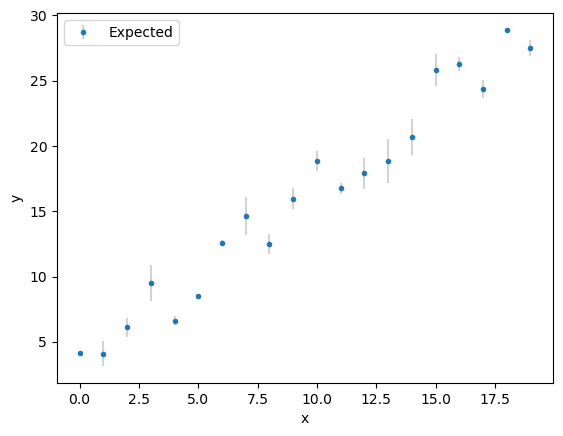

In [4]:
plt.errorbar(x, y, yerr=y_error, fmt='.', ecolor='LightGrey', label="Expected")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

In [5]:
def likelihood(params):
    m, b, sigma = params

    y_m = m * x + b

    # L = (len(x)/2 * np.log(2 * np.pi) + len(x)/2 * np.log(sigma ** 2) + 1 /
    #      (2 * sigma ** 2) * sum((y - y_exp) ** 2))
    
    L = 0
    for y_i, y_m_i in zip(y, y_m):
        L += (-0.5 * (y_i - y_m_i)**2 / sigma**2)
    L = L + (len(x) / 2) * np.log(2 * np.pi * sigma**2) 

    return L

<function __main__.likelihood(params)>

<function likelihood at 0x0000023FD8B95990>


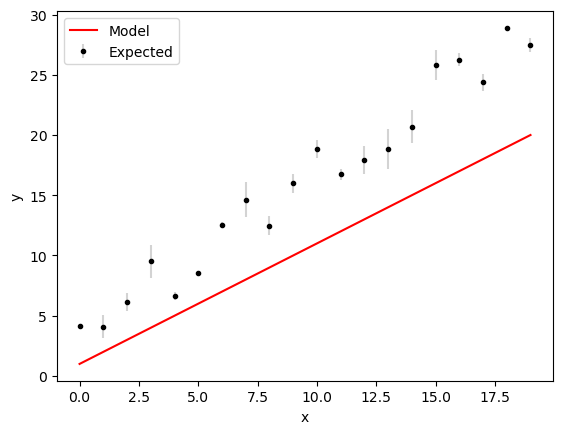

In [18]:
likelihood_model = optimize.minimize(likelihood, np.array([1, 1, 1]))#, method='Nelder-Mead')
print(likelihood)

plt.errorbar(x, y, yerr=y_error, fmt='.', color='black', ecolor='LightGrey', label="Expected")
plt.plot(x, likelihood_model['x'][0] * x + likelihood_model['x'][1], color='red',label="Model")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()